In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pykat import finesse
from pykat.commands import * 
from IPython.display import display, HTML 

%matplotlib inline

In [29]:
kat1 = finesse.kat()
kat1.verbose = False

In [30]:
code = """
# Ex3b.kat 
# Simple cavity, misaligning input beam and/or cavity. 
# Use ad's to look at HOM content in input beam.
# Create a mode mismatch, look at mode content.
# 
#
# P. Fulda 2013.06.17
######################################################


# interferometer parts
l laser 1 0 nlaser

# Change mode composition of input field

s laser2BS 1 nlaser nBSin
bs BS 1 0 0 45 nBSin nBSrefl dump dump
s sBStoITM 1 nBSrefl nITMin
m ITM 0.99 0.01 0 nITMin nITMtrans
s cavityspace 1 nITMtrans nETMin
m ETM 0.99 0.01 0 nETMin nETMtrans

# for the Gaussian beam tracing part
cav mycav ITM nITMtrans ETM nETMin
attr ETM Rc 5
trace 2
trace 8

# for the mode mismatch part
gauss mismatch BS nBSrefl 832u -1 

maxtem 6
# detectors and commands for doing a mode scan
#/*
pd DCPDtrans nETMtrans
#/*
ad PDin0 0 0 0 nITMin*
ad PDin1 1 0 0 nITMin*
ad PDin2 2 0 0 nITMin*
ad PDin3 3 0 0 nITMin*
ad PDin4 4 0 0 nITMin*
#*/

# xaxis command
xaxis BS xbeta lin 0 0.1m 100
#xaxis ETM xbeta lin 0 0.1m 100
#x2axis ETM phi lin -1 5 100

#xaxis mismatch zrx lin 1.5 2.5 500
#xaxis mismatch zx lin -2 0 500
#*/"""

In [31]:
kat1.parse(code)
out = kat1.run()

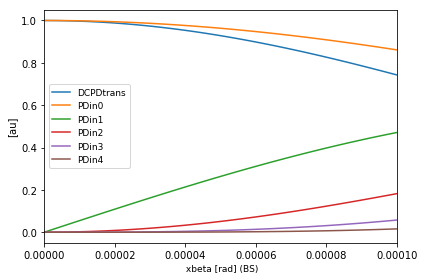

In [32]:
fig = out.plot()